                                                           Notebook created by Dragos Gruia and Valentina Giunchiglia

# Introduction to plotting

The most commonly used `module` to create plots and figures in Python is `matplotlib`. Recently, the module `seaborn` has become more famous, since it allows to create better looking plots. But for now, we will focus on `matplotlib` due to the higher complexity of `seaborn`. If in the future you would like to learn more about `seaborn`, you can check out the online [tutorials](https://seaborn.pydata.org/tutorial.html). However, this is not needed for this module.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
songs = pd.read_csv("Data/Day9_data.csv", low_memory = False)
songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


Visualizing data through dataframes is useful, but not as easy to interpret as by looking at plots.

## Scatterplots

In Python, when you want to create a figure, you always have to create a figure using `plt.figure` and specify the size of the figure in the parenthesis (width, height). Then, you can call the command for the specific plot you are interested in - in this case a scatterplot. `Scatterplots` are useful plots to show the relationship between two variables in a dataframe. Let's try to see if there is a relationship between loudness and energy.

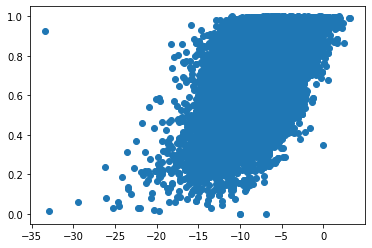

In [3]:
plt.figure(figsize = (6, 4))
plt.scatter(songs["loudness"], songs["energy"])

Of course there are ways to make the plot look better, by for example adding a title, or axis labels, by removing the ticks around the figure or by changing the colours. 

([], [])

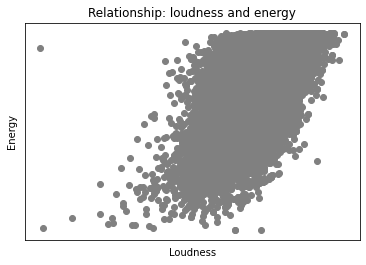

In [4]:
plt.figure(figsize = (6, 4))
plt.scatter(songs["loudness"], songs["energy"], color = "grey")
plt.title("Relationship: loudness and energy")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.xticks([])
plt.yticks([])

if you want to save the figure that you just created, you can just add the command `plt.savefig` at the end (as shown in the next plot)

## Histograms

Histograms can be useful to look at the distribution of different values. The function to create an histogram in matplot is `plt.hist` and takes as input arguments the column of the dataframe to plot and the number of bins. The higher is the number of bins, the more bars the histogram has.

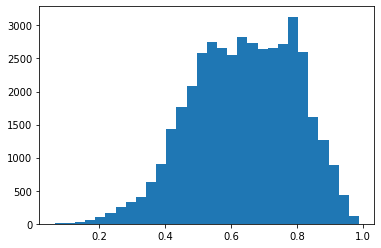

In [5]:
plt.figure(figsize = (6, 4))
_ = plt.hist(songs["danceability"], bins = 30)
plt.savefig("figure1.png")

An alternative to just defining the number of bins is to provide a list of bins as input

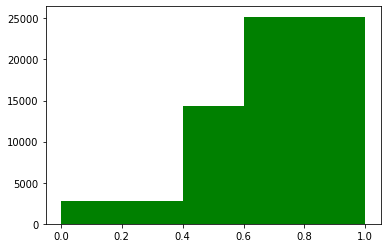

In [6]:
plt.figure(figsize = (6, 4))
_ = plt.hist(songs["danceability"], bins = [0, 0.4, 0.6, 1], color = "green")

**IMPORTANT**: Be careful on how you define the bins, because they could really change the way the plot looks.

## Boxplots

Boxplots are useful to visualise the distribution of the data in terms of the first quartile [Q1], median, and third quartile [Q3]. It can also give you information about potential outliers in your dataset.

([], [])

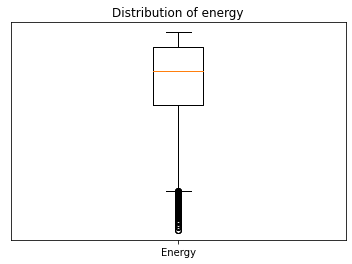

In [7]:
plt.figure(figsize = (6, 4))
plt.boxplot(songs["energy"])
plt.xticks([1],["Energy"])
plt.title("Distribution of energy")
plt.yticks([])

It is also possible to create multiple boxplots one next to the other by providing as input a list of columns of the original dataframe

In [8]:
data = [songs["energy"], songs["danceability"], songs["liveness"]]

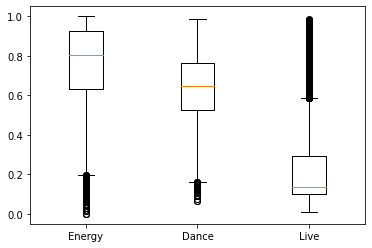

In [9]:
plt.figure(figsize = (6, 4))
_ = plt.boxplot(data)
_ = plt.xticks([1, 2, 3],["Energy", "Dance", "Live"])

## Pie charts

Pie charts are useful to represent different proportion of data, where the full pie chart corresponds to 100% and each section to a portion of the full percentage. In order to be able to draw it is, therefore, necessary to calculate these percentages. To undestand how pie charts are created, let's start with a simple example.

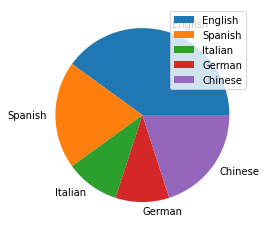

In [10]:
perc = [40, 20, 10, 10, 20]
labels = ["English", "Spanish", "Italian", "German", "Chinese"]
plt.figure(figsize = (4, 4))
_ = plt.pie(perc, labels = labels)
plt.legend() # remove this command if you don't want to plot the legend

What if you want to show the percentages of each slice? Then you can add the command `autopct`

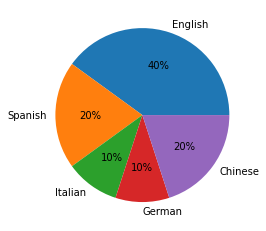

In [11]:
perc = [40, 20, 10, 10, 20]
labels = ["English", "Spanish", "Italian", "German", "Chinese"]
plt.figure(figsize = (4, 4))
_ = plt.pie(perc, labels = labels, autopct='%1.0f%%')

-----------

### Code here
Now try to create a pie charts with the songs dataset. You want to show how many songs there are of each genre. Remember, you first need to be able to calculate that, then you can create the plot.

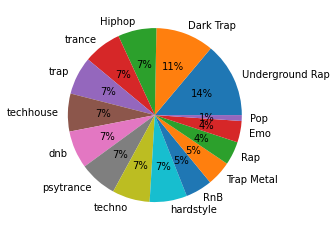

In [26]:
# Code here

perc_genres = songs.genre.value_counts()
labels = perc_genres.index
perc = perc_genres.values
plt.figure(figsize = (4, 4))
_ = plt.pie(perc, labels = labels, autopct='%1.0f%%')

----------

## Barplots

Barplots are useful to represent categorical data, and in general can be used to show the relationship between numeric and categorical data.
Let's try to use a barplot to show how many songs there are for each genre. To be able to do this, we need to get this information using the function *value_counts*.

The input of a barplot is the list of categorical variables and then the numerical data (in this case the number of songs for each genre).

<BarContainer object of 15 artists>

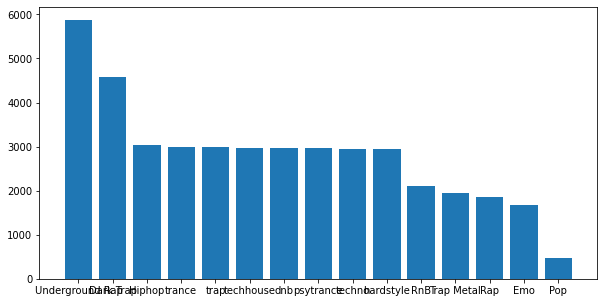

In [13]:
count = pd.DataFrame(songs["genre"].value_counts())
plt.figure(figsize = (10, 5))
plt.bar(count.index, count["genre"])

As you can see the labels are overlapping. A solution is to rotate them. 

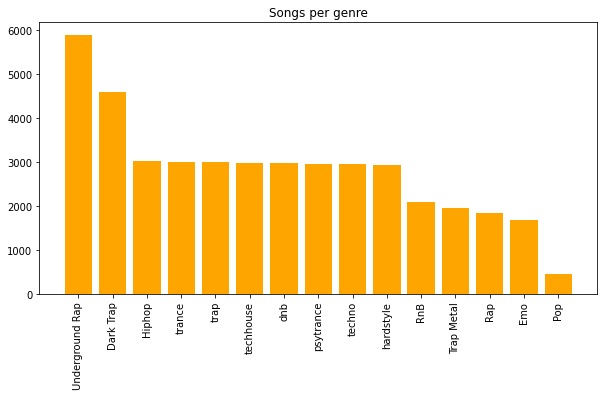

In [14]:
plt.figure(figsize = (10, 5))
plt.bar(count.index, count["genre"], color = "orange")
plt.title("Songs per genre")
_ = plt.xticks(rotation=90)

## Subplots

Until now, we have always plotted unique plots. However in Python it is possible to plot a figure with multiple subplots by using the command `plt.subplot`. The `plt.subplot` command takes as input the (number or rows, number of columns, plot number).

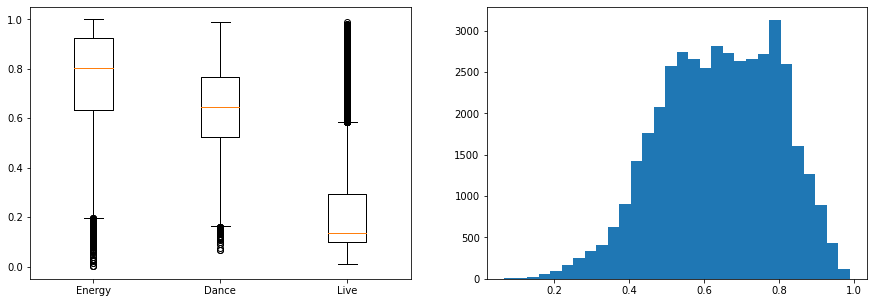

In [15]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
_ = plt.boxplot(data)
_ = plt.xticks([1, 2, 3],["Energy", "Dance", "Live"])
plt.subplot(1,2,2)
_ = plt.hist(songs["danceability"], bins = 30)